# ECMWF Tropical Cyclone Data Extractor - MARIO Example

The extractor downloads tropical cyclone track BUFR files from ECMWF's Dissemination (DISS) system at https://essential.ecmwf.int/. It provides dynamic access to forecast data based on date/time parameters.

## Download

In [2]:
from ecmwf_tc_data_downloader import download_tc_data, list_available_storms

### List available storms

In [3]:
storms = list_available_storms(limit=1)

print(f"Found {len(storms)} unique storms:")
for i, storm in enumerate(storms, 1):
    print(f"{i:2d}. {storm['storm_name']:8s} at {storm['latitude']:12s}, {storm['longitude']:12s} (Forecast: {storm['forecast_time']})")

Found 1 forecast dates
   Found 4 tropical cyclone track files
Found 0 unique storms
Found 0 unique storms:


### Download latest forecasts

In [4]:
results = download_tc_data(limit=1, storm_name='MARIO', output_dir='tc_mario')

Found 1 forecast dates
Processing 1 forecast(s)
Filtering for storm: MARIO

   Found 0 tropical cyclone track files
Summary:
   Successfully downloaded: 0 files
   Failed downloads: 0 files
   Files saved to: tc_mario/


## Extract

In [5]:
from ecmwf_tc_data_extractor import extract_tc_data, extract_tc_data_from_file

In [6]:
# Extract data from the downloaded KIKO storm file
filename = 'tc_mario/A_JSXX01ECEP150000_C_ECMP_20250915000000_tropical_cyclone_track_MARIO_-111p1degW_19p1degN_bufr4.bin'

# Extract using the main function (saves to CSV automatically)
result = extract_tc_data_from_file(filename, output_dir='tc_mario')

Extracting tropical cyclone data from: tc_mario/A_JSXX01ECEP150000_C_ECMP_20250915000000_tropical_cyclone_track_MARIO_-111p1degW_19p1degN_bufr4.bin
Stage 1: Reading BUFR file structure...
Storm: 13E, Ensemble Members: 52
Forecast Base Time: 2025-09-15 00:00:00
Number of Subsets: 52
Stage 2: Extracting data arrays from BUFR Section 4...
Array sizes:
  latitude: 1457
  longitude: 1457
  significance: 80
    Unique values: [1 3 4 5]
  time_period: 13
  pressure: 728
  wind_speed: 728
  wind_threshold: 42
    Unique values: [18 26 33]
  bearing: 336
    Unique values: [  0.  90. 180. 270.]

Stage 3: Mapping wind radii data to positions...
Processing 1457 positions...
Mapping wind radii data using systematic array association...

Stage 4: Structuring data and creating comprehensive records...
Total records created: 1457
Records with coordinates: 855
Records with wind radii data: 42

Wind threshold distribution:
  35 knots: 14 records
  51 knots: 14 records
  64 knots: 14 records

Bearing di

### Extract data without saving to CSV

In [7]:
df = extract_tc_data(filename, verbose=False)

print(f"Extracted {len(df)} records")
print(f"Columns: {list(df.columns)}")
print(f"Sample data:")
print(df.head())

Extracted 1457 records
Columns: ['storm_id', 'ensemble_member', 'forecast_step_hours', 'datetime', 'significance_code', 'position_type', 'latitude', 'longitude', 'pressure_pa', 'pressure_hpa', 'wind_speed_ms', 'wind_speed_knots', 'wind_threshold_ms', 'wind_threshold_knots', 'bearing_degrees', 'max_radius_km', 'array_index', 'has_wind_radii']
Sample data:
  storm_id  ensemble_member  forecast_step_hours            datetime  \
0      13E                1                    6 2025-09-15 06:00:00   
1      13E                2                    6 2025-09-15 06:00:00   
2      13E                3                    6 2025-09-15 06:00:00   
3      13E                4                    6 2025-09-15 06:00:00   
4      13E                5                    6 2025-09-15 06:00:00   

   significance_code      position_type  latitude  longitude  pressure_pa  \
0                  1       storm_center      19.1     -111.1     100300.0   
1                  4  analysis_position      18.6     -1

In [8]:
df

,storm_id,ensemble_member,forecast_step_hours,datetime,significance_code,position_type,latitude,longitude,pressure_pa,pressure_hpa,wind_speed_ms,wind_speed_knots,wind_threshold_ms,wind_threshold_knots,bearing_degrees,max_radius_km,array_index,has_wind_radii
0,13E,1,6,2025-09-15 06:00:00,1,storm_center,19.1,-111.1,100300.0,1003.0,12.4,24.103616,18.0,34.98912,0.0,None,0,True
1,13E,2,6,2025-09-15 06:00:00,4,analysis_position,18.6,-110.7,100300.0,1003.0,12.4,24.103616,26.0,50.53984,90.0,None,1,True
2,13E,3,6,2025-09-15 06:00:00,4,analysis_position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2,False
3,13E,4,6,2025-09-15 06:00:00,4,analysis_position,19.5,-111.5,NaN,NaN,NaN,NaN,33.0,64.14672,90.0,None,3,True
4,13E,5,6,2025-09-15 06:00:00,4,analysis_position,18.8,-111.2,100400.0,1004.0,13.4,26.047456,18.0,34.98912,180.0,None,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,13E,49,78,2025-09-18 06:00:00,4,analysis_position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1452,False
1453,13E,50,78,2025-09-18 06:00:00,4,analysis_position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1453,False
1454,13E,51,78,2025-09-18 06:00:00,4,analysis_position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1454,False
1455,13E,52,78,2025-09-18 06:00:00,4,analysis_position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1455,False


## Explore

In [9]:
from ecmwf_tc_data_explorer import (
    load_tc_data,
    calculate_wind_radii_from_points,
    create_track_visualization,
    create_wind_field_visualization,
    create_data_availability_visualization,
    create_wind_radii_spatial_plot,
    create_wind_radii_direction_plot
)

In [10]:
# Load the extracted data
csv_file = 'tc_mario/A_JSXX01ECEP150000_C_ECMP_20250915000000_tropical_cyclone_track_MARIO_-111p1degW_19p1degN_bufr4_extracted.csv'

# Load data
df = load_tc_data(csv_file)

# Calculate wind radii
df, radii_df = calculate_wind_radii_from_points(df)

Total records loaded: 1457
Columns in dataset: 18

Data quality summary:
  storm_id: 1457/1457 values (100.0%)
  ensemble_member: 1457/1457 values (100.0%)
  forecast_step_hours: 1457/1457 values (100.0%)
  datetime: 1457/1457 values (100.0%)
  position_type: 1457/1457 values (100.0%)
  latitude: 855/1457 values (58.7%)
  longitude: 855/1457 values (58.7%)
  wind_speed_knots: 854/1457 values (58.6%)
  wind_threshold_knots: 42/1457 values (2.9%)
  bearing_degrees: 42/1457 values (2.9%)
  has_wind_radii: 1457/1457 values (100.0%)

Wind radii analysis:
  Records with wind radii flags: 42
  Records with coordinates: 42
  Records with wind thresholds: 42
  Records with bearings: 42
Calculated radii for 42 wind points
Radius range: 0.0 to 163.5 km


### Data Availability

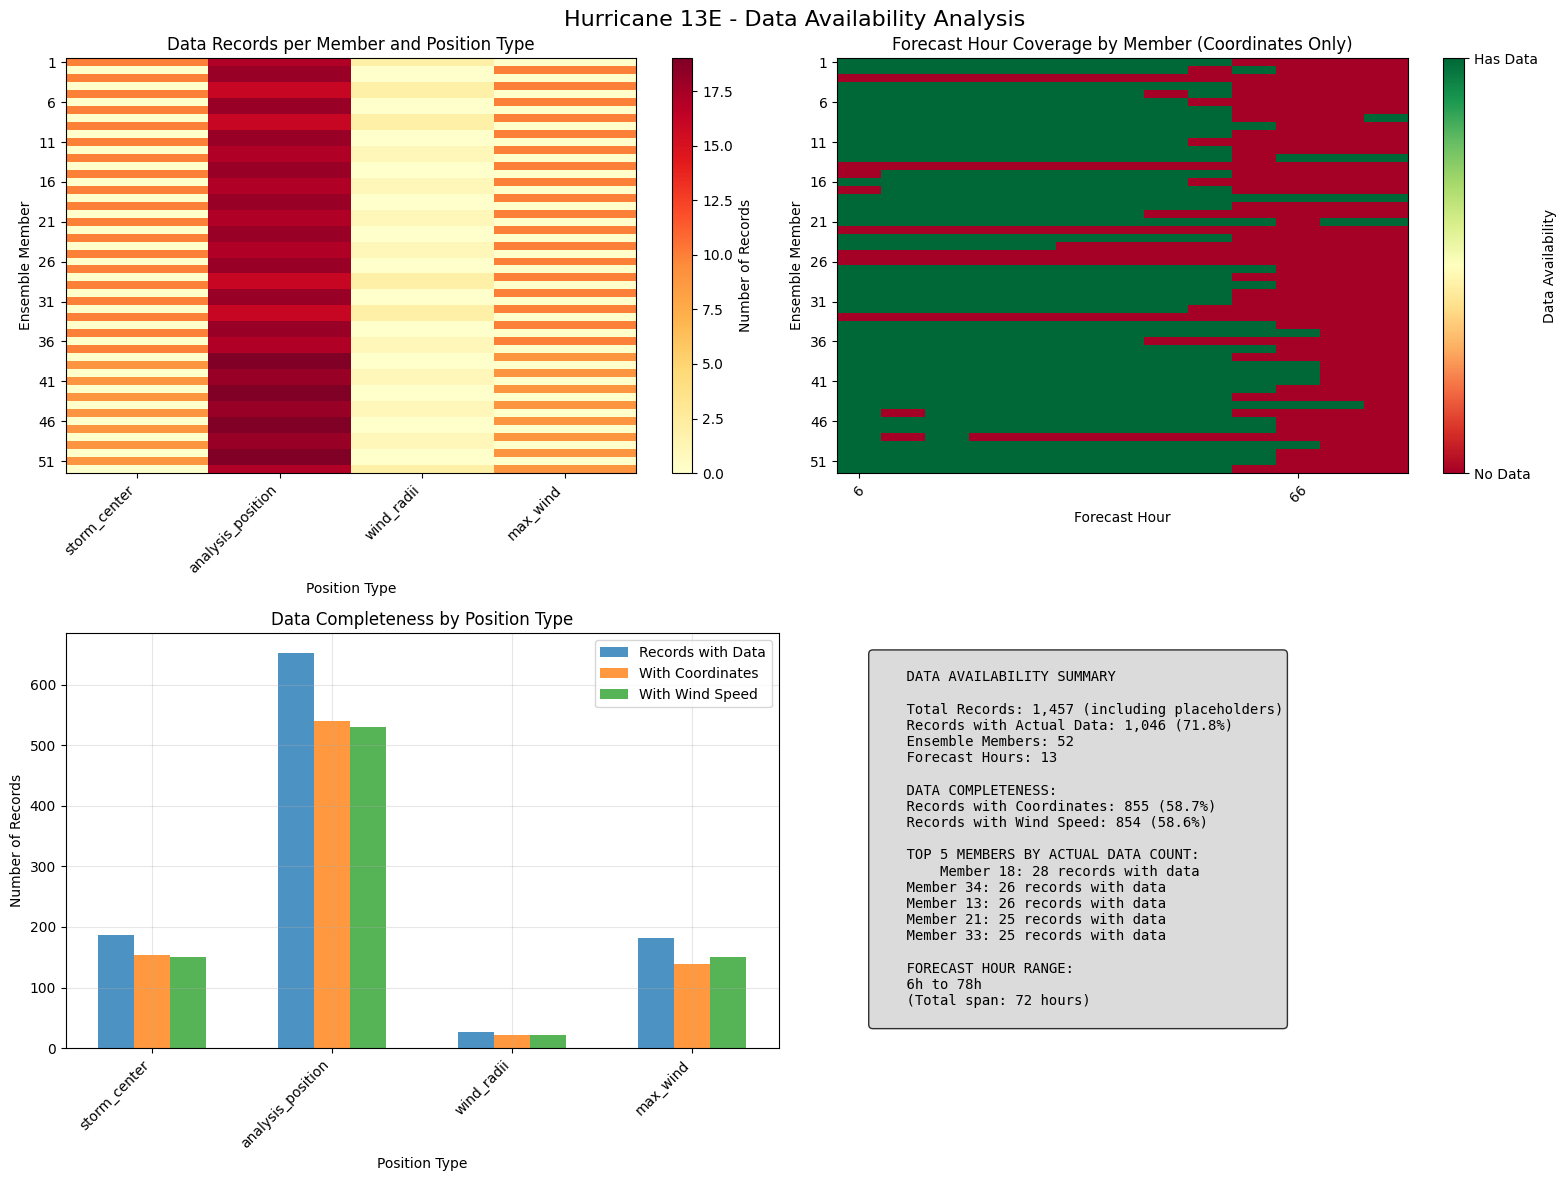

In [11]:
fig_availability = create_data_availability_visualization(df)

### Track visualization

Displaying all 23 ensemble members


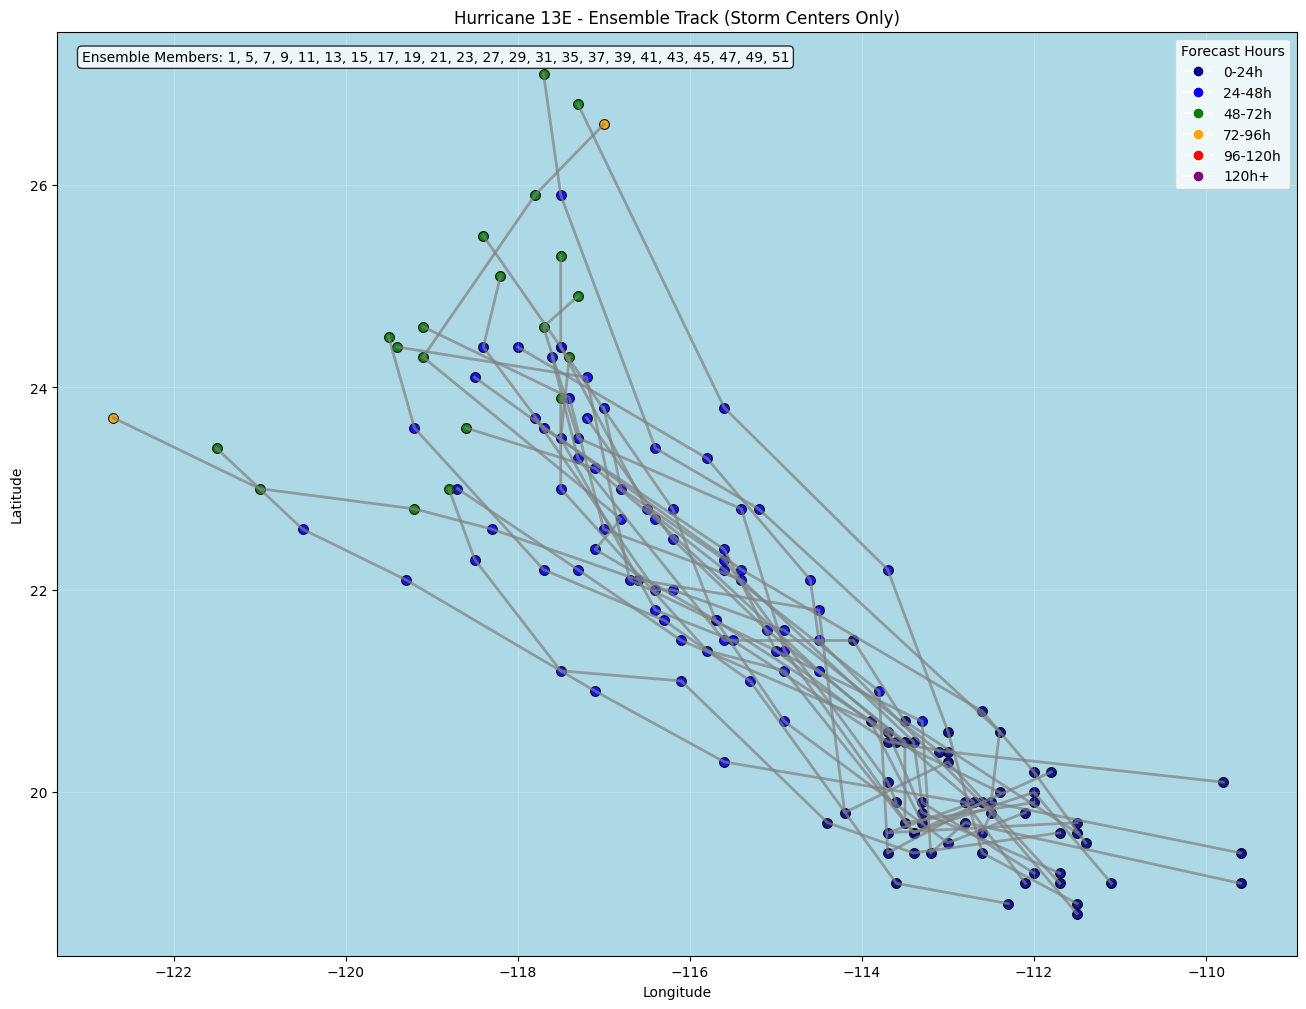

In [12]:
fig_tracks = create_track_visualization(df)

### Wind Fields Visualization

Displaying all 23 ensemble members
  Drawing 42 directional wind swaths...


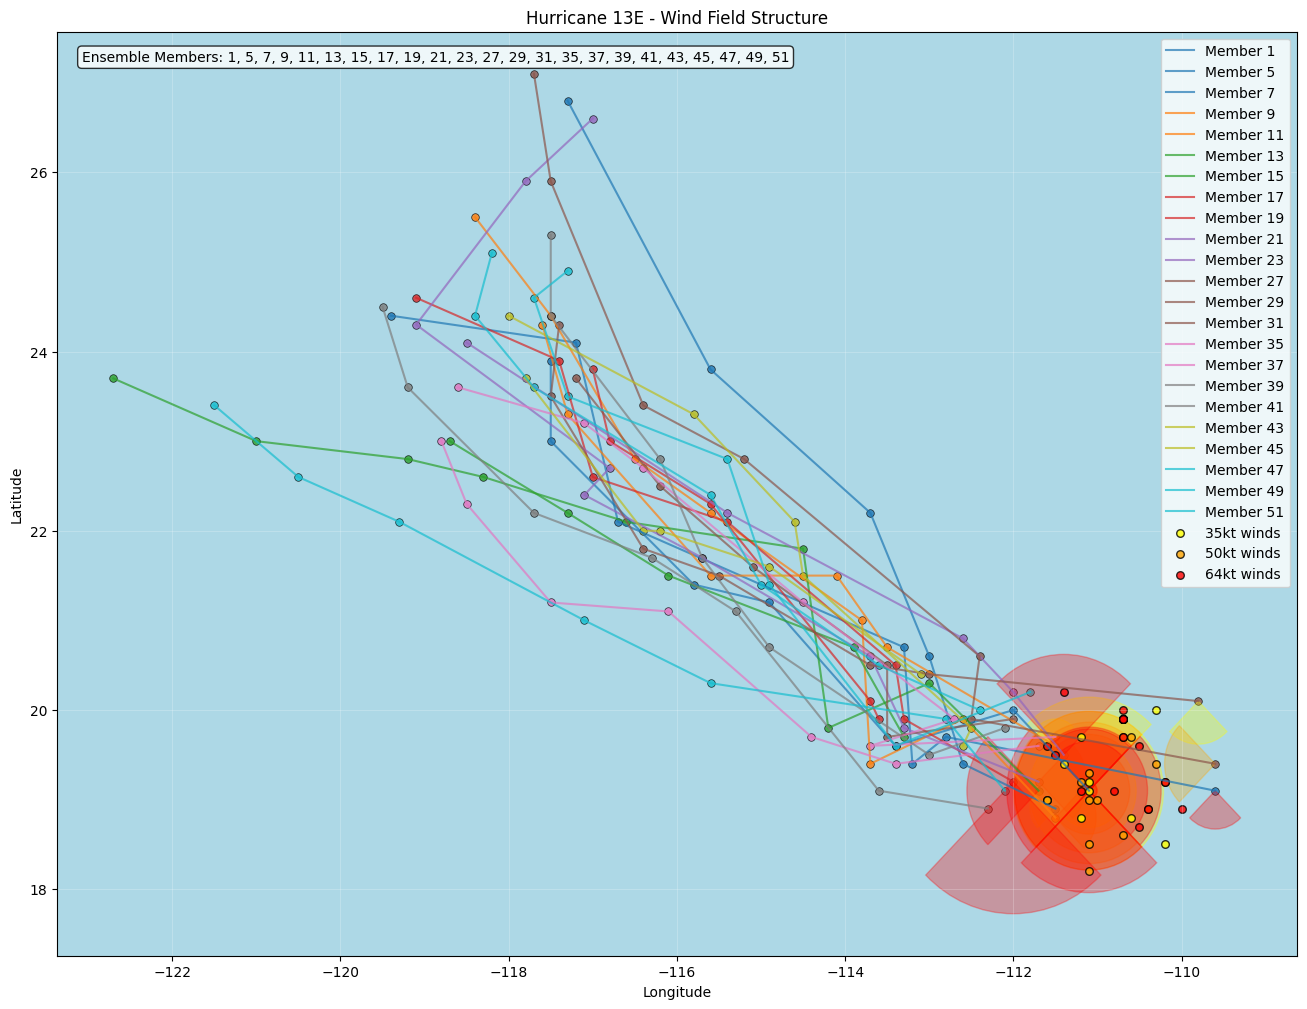

In [13]:
fig_wind_fields = create_wind_field_visualization(df, radii_df)

### Wind Radii Spatial Plot

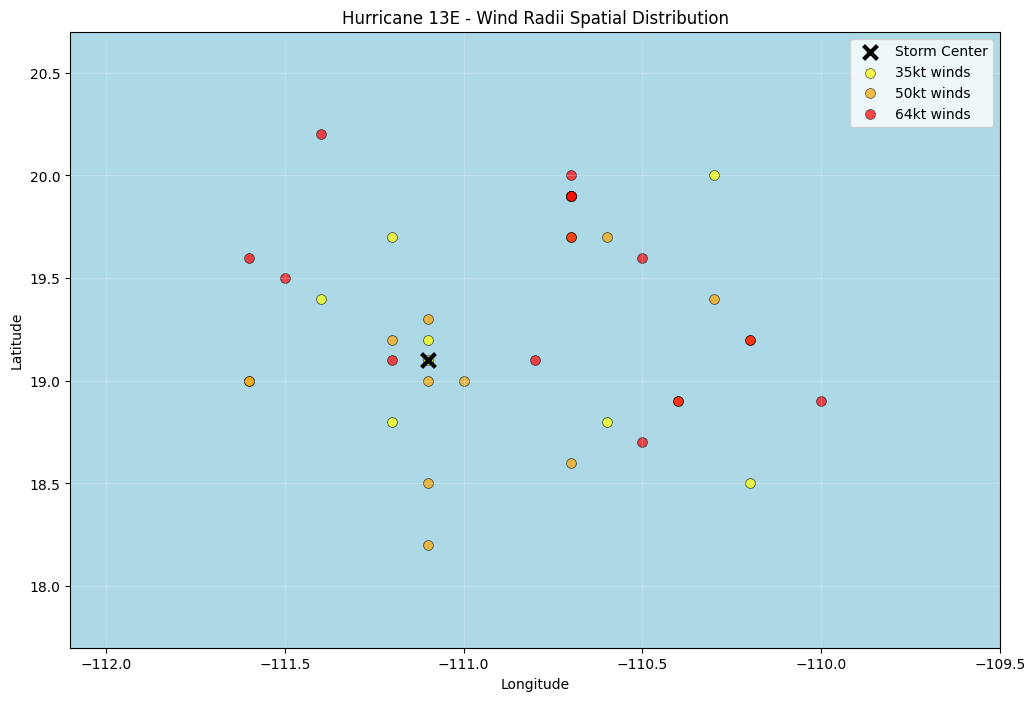

In [14]:
fig_radii_spatial = create_wind_radii_spatial_plot(df, radii_df)

### Wind Radii Direction Plot

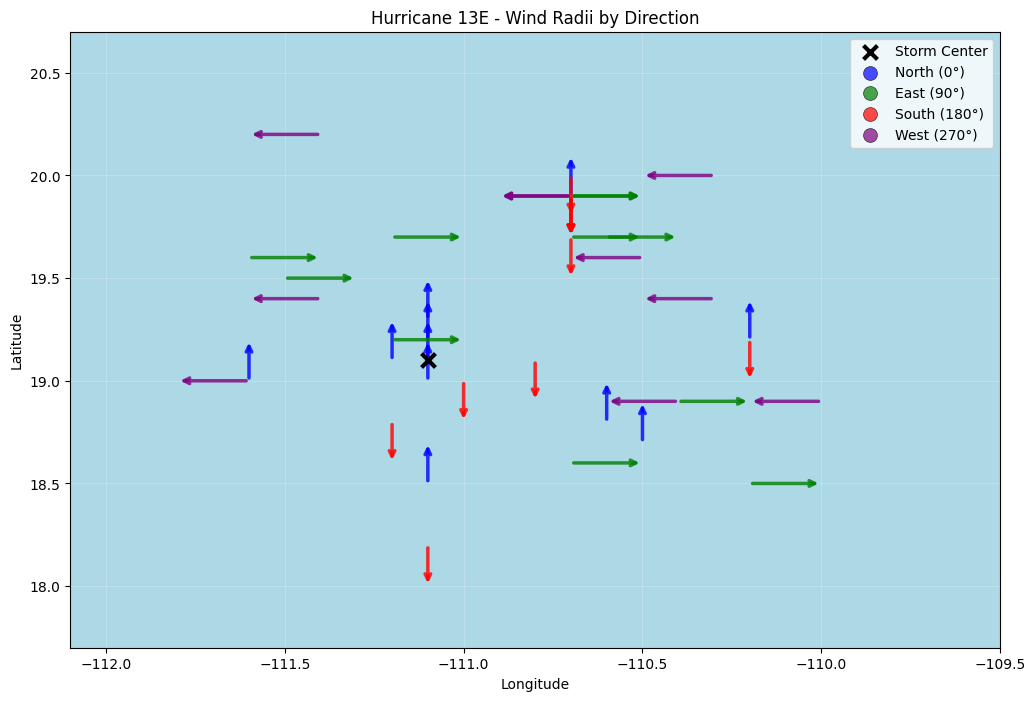

In [15]:
fig_radii_direction = create_wind_radii_direction_plot(df, radii_df)